<a href="https://colab.research.google.com/github/koc90/part_3_teamwork/blob/main/Notebook_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wstępna analiza danych




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def simple_figure(feature1, feature2, fsize=(30,10), marker="."):
  plt.figure(figsize=fsize)
  plt.plot(df[feature1], df[feature2], marker)
  plt.grid(True)
  plt.xlabel(feature1)
  plt.ylabel(feature2)
  plt.show()


In [ ]:
df = pd.read_csv("internet_service_churn.csv")
print(df.columns)

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'reamining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')


In [ ]:
#Poprawa literówki, zmiana 'reamining_contract' na 'remaining_contract'
df.columns = ['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn']

print(df.columns)

Index(['id', 'is_tv_subscriber', 'is_movie_package_subscriber',
       'subscription_age', 'bill_avg', 'remaining_contract',
       'service_failure_count', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')


In [ ]:
empty_cells = {column_name: df[column_name].isna().sum() for column_name in df.columns}
print(empty_cells)

{'id': 0, 'is_tv_subscriber': 0, 'is_movie_package_subscriber': 0, 'subscription_age': 0, 'bill_avg': 0, 'remaining_contract': 21572, 'service_failure_count': 0, 'download_avg': 381, 'upload_avg': 381, 'download_over_limit': 0, 'churn': 0}


In [ ]:
all_columns = df.columns

In [ ]:
corr_id_subscription_age = df[all_columns].corrwith(df['id'])
print(corr_id_subscription_age)

id                             1.000000
is_tv_subscriber               0.282052
is_movie_package_subscriber    0.132197
subscription_age              -0.602241
bill_avg                       0.018718
remaining_contract             0.348195
service_failure_count         -0.026589
download_avg                   0.241278
upload_avg                     0.145936
download_over_limit           -0.228932
churn                         -0.451142
dtype: float64


Id jest cechą, za którą idzie jedynie informacja, kto jest dłużej od kogo w systemie. W sytuacji, gdy mamy cechę "subscription_age", która zawiera w sobie informację niesioną przez "id", cechę "id" usuwamy. Widzimy, że istnieje odwrotna korelacja pomiędzy "id", a "subscription_age", co oznacza, że im wyższe "id" tym niższy wiek subskrypcji. Zależnośc ta nie jest liniowa, stąd współczynnik korelacji nie wynosi -1, tylko co do modułu mniej. Liniowa byłaby tylko wtedy, gdyby klienci rejestrowali się w równych odstępach czasowych, a tak, jak wiadomo, nigdy nie jest.


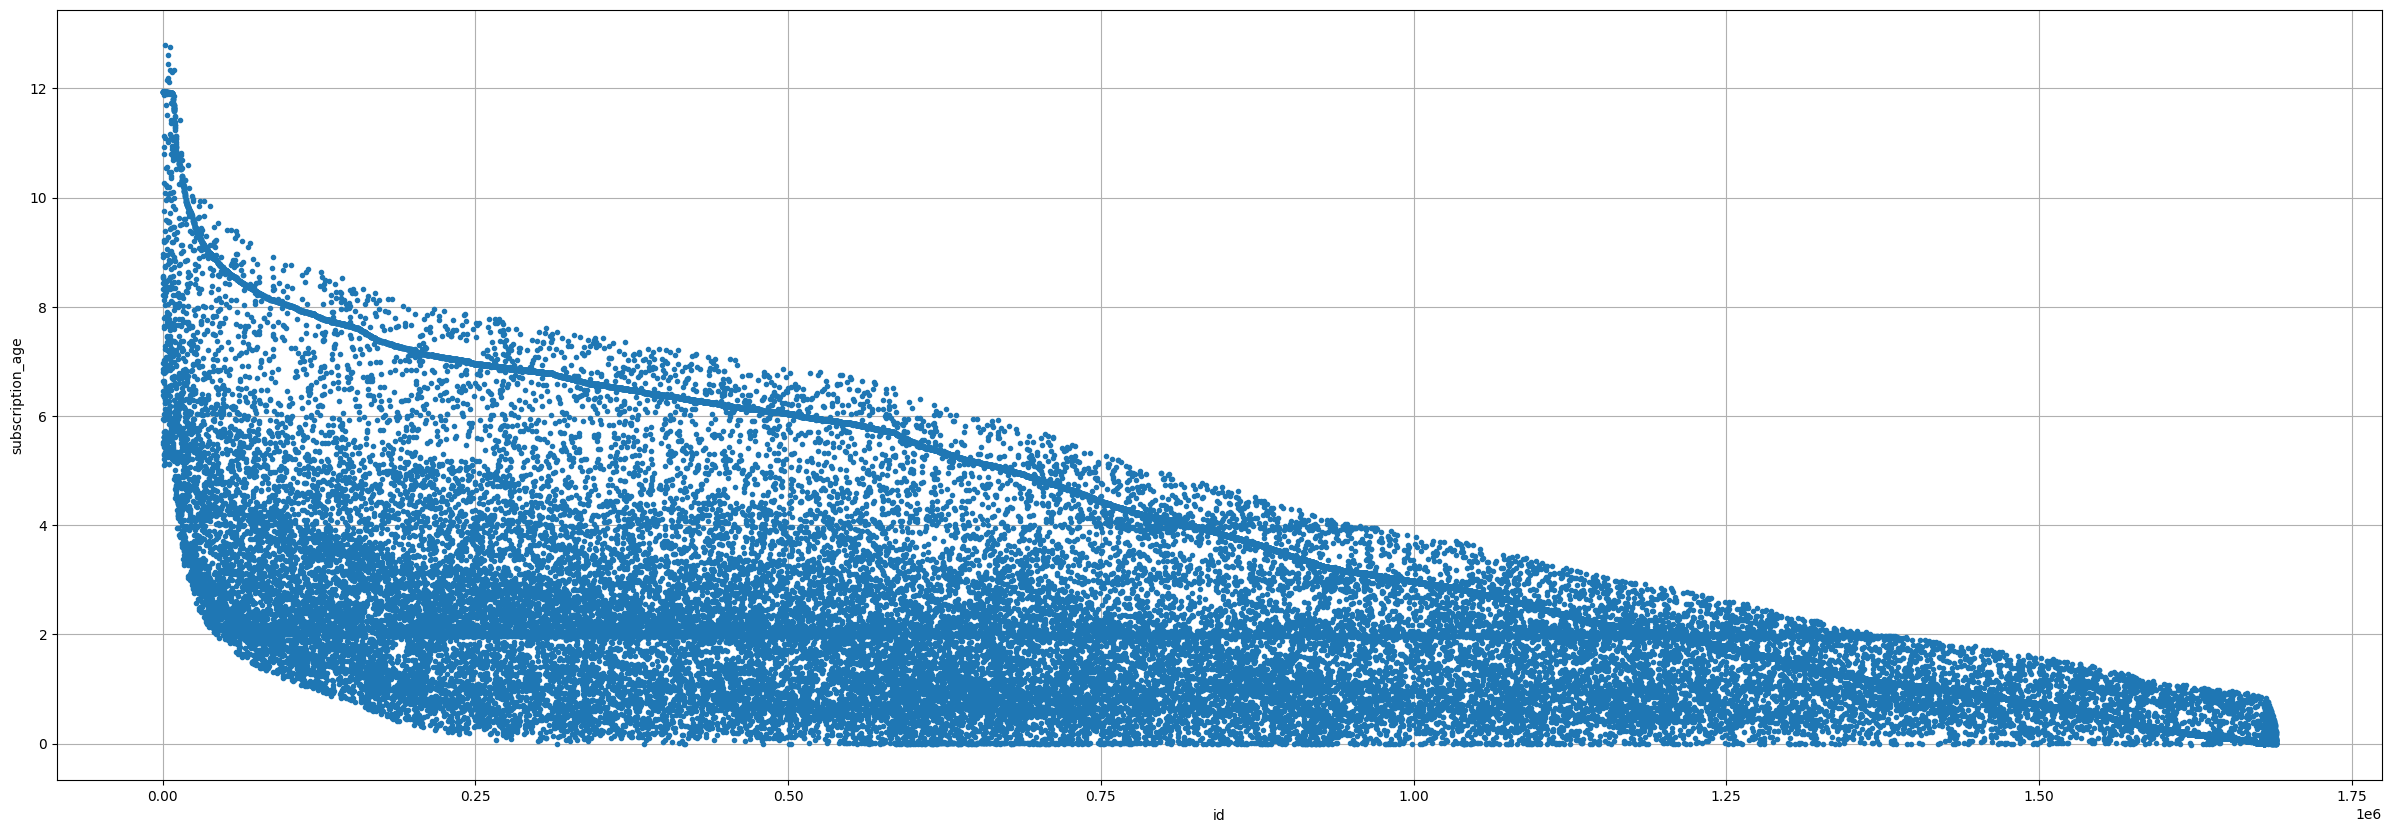

In [ ]:
simple_figure(feature1="id", feature2="subscription_age")

In [ ]:
df = df[all_columns[1: ]]

In [ ]:
all_columns = df.columns
print(all_columns)

Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'remaining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit', 'churn'],
      dtype='object')


In [ ]:
print(df.shape)

(72274, 10)


In [ ]:
y_num = df.shape[1] - 1
y_name = all_columns[y_num]
X_names = all_columns[0: -1]


print(f"X_names = {X_names}, y_name = {y_name}")


X_names = Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'bill_avg', 'remaining_contract', 'service_failure_count',
       'download_avg', 'upload_avg', 'download_over_limit'],
      dtype='object'), y_name = churn


In [ ]:
types = df.dtypes
print(f"types = {types}")

types = is_tv_subscriber                 int64
is_movie_package_subscriber      int64
subscription_age               float64
bill_avg                         int64
remaining_contract             float64
service_failure_count            int64
download_avg                   float64
upload_avg                     float64
download_over_limit              int64
churn                            int64
dtype: object


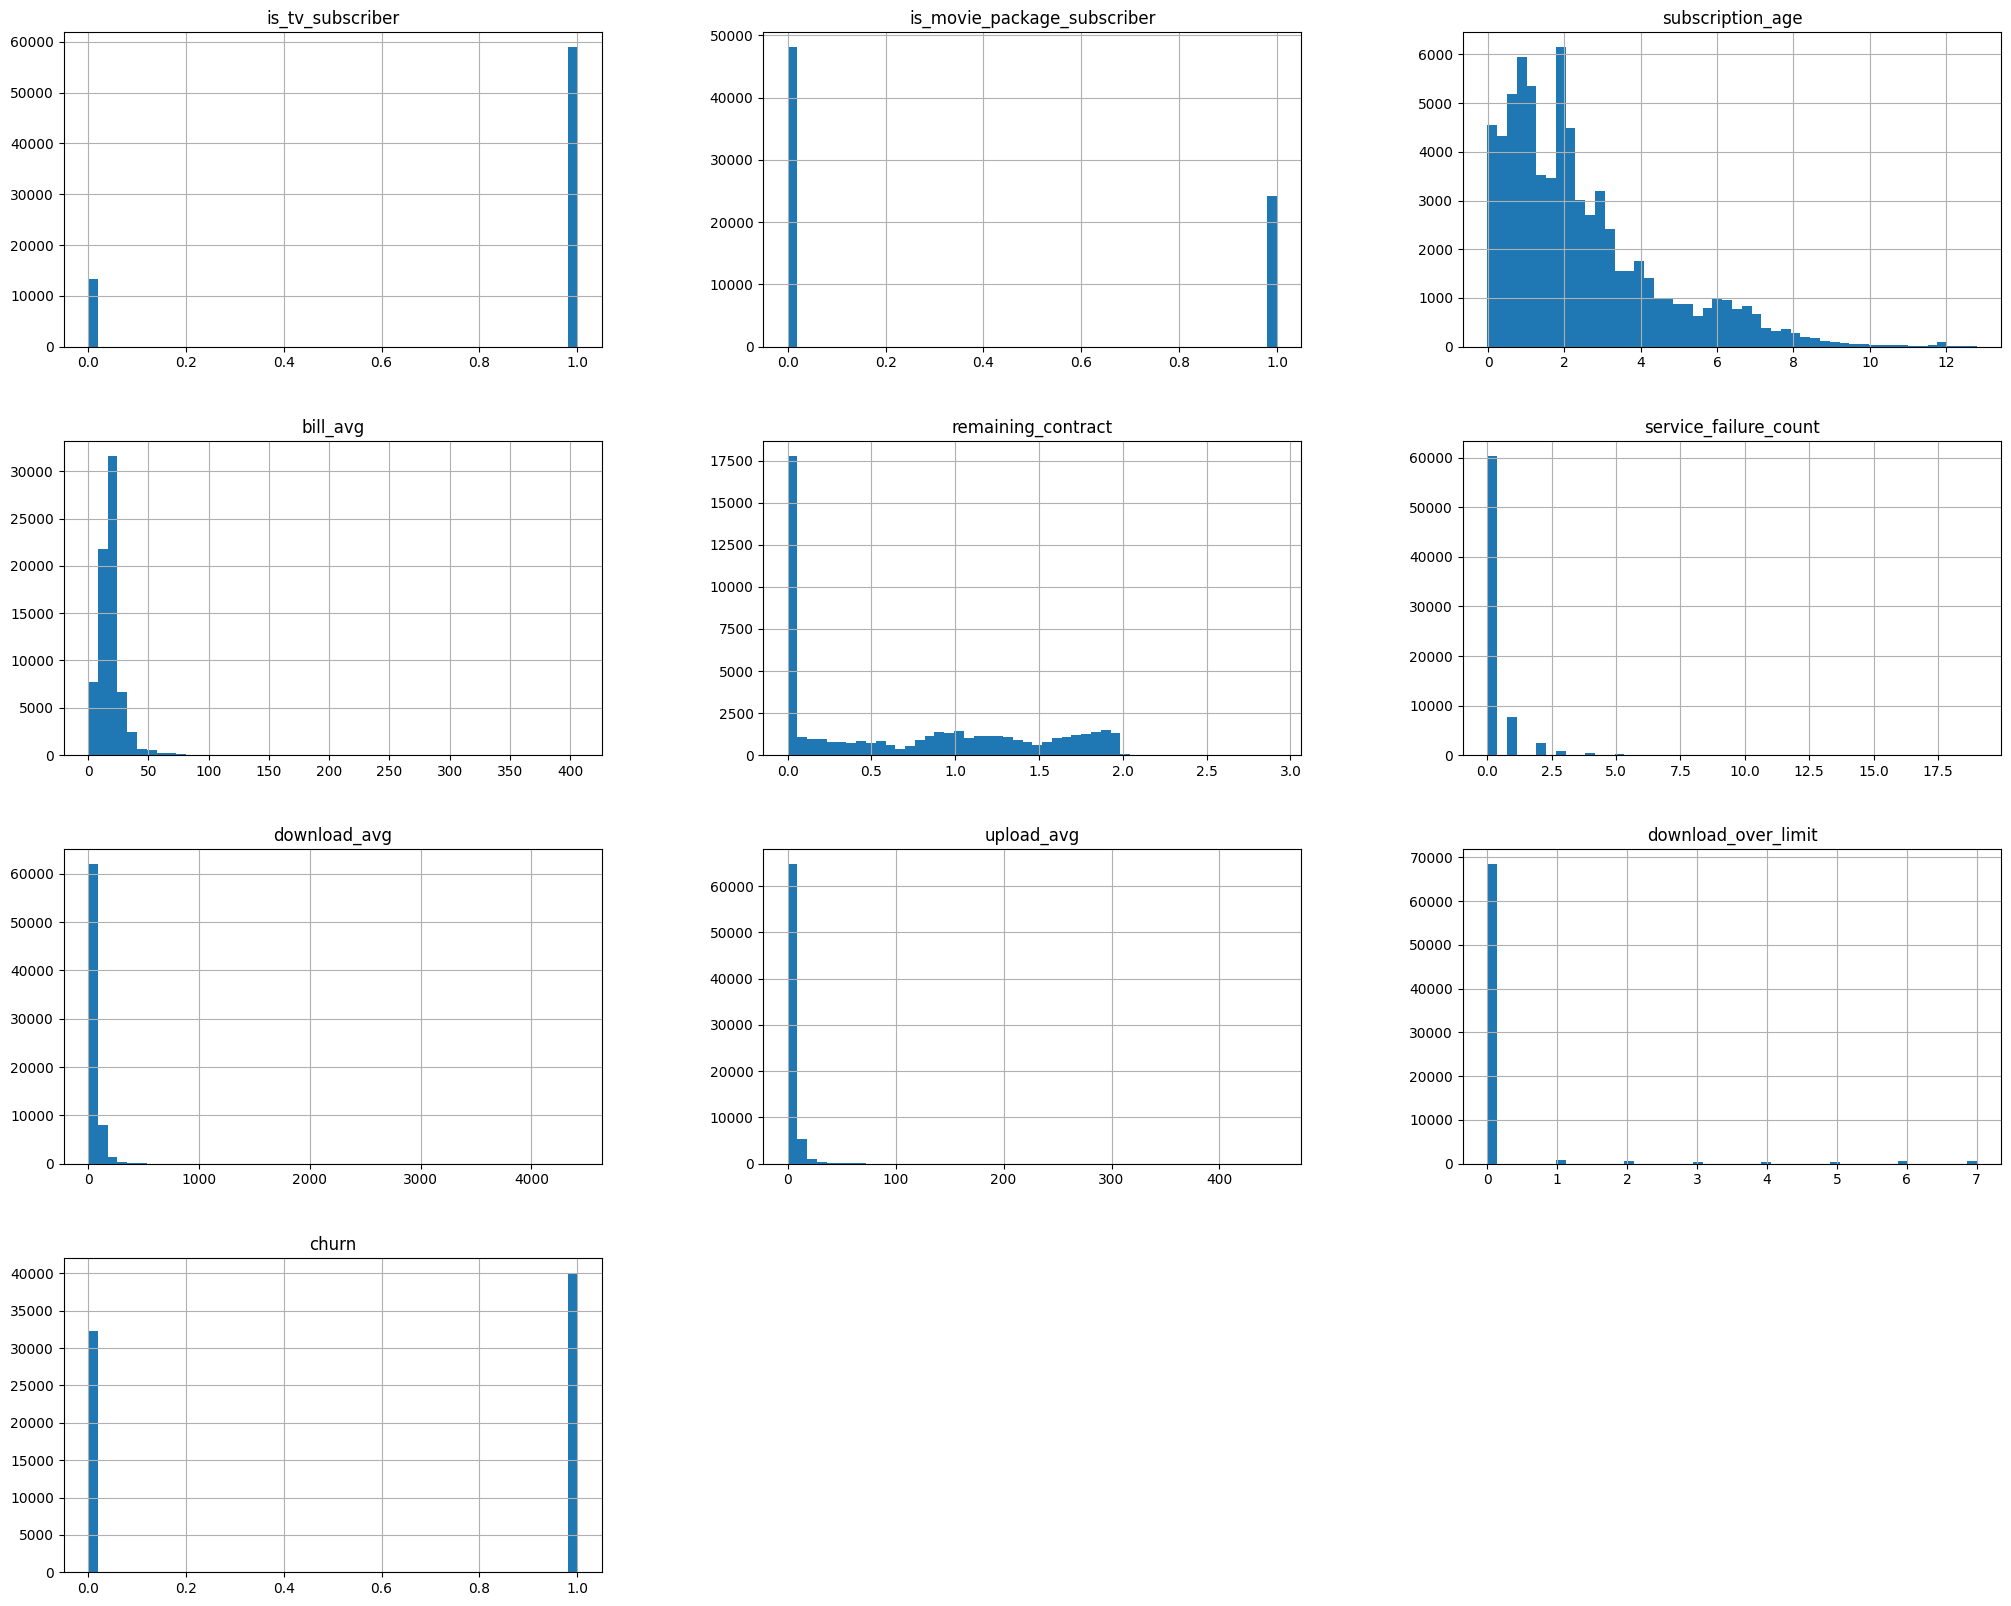

In [ ]:
df.hist(bins=50, figsize=(25, 20))
plt.show()

In [ ]:
df.describe()

is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
count      72274.000000                 72274.000000      72274.000000   
mean           0.815259                     0.334629          2.450051   
std            0.388090                     0.471864          2.034990   
min            0.000000                     0.000000         -0.020000   
25%            1.000000                     0.000000          0.930000   
50%            1.000000                     0.000000          1.980000   
75%            1.000000                     1.000000          3.300000   
max            1.000000                     1.000000         12.800000   

           bill_avg  remaining_contract  service_failure_count  download_avg  \
count  72274.000000        50702.000000           72274.000000  71893.000000   
mean      18.942483            0.716039               0.274234     43.689911   
std       13.215386            0.697102               0.816621     63.405963   
min        0.000000            0.000000               0.000000      0.000000   
25%       13.000000            0.000000               0.000000      6.700000   
50%       19.000000            0.570000               0.000000     27.800000   
75%       22.000000            1.310000               0.000000     60.500000   
max      406.000000            2.920000              19.000000   4415.200000   

         upload_avg  download_over_limit         churn  
count  71893.000000         72274.000000  72274.000000  
mean       4.192076             0.207613      0.554141  
std        9.818896             0.997123      0.497064  
min        0.000000             0.000000      0.000000  
25%        0.500000             0.000000      0.000000  
50%        2.100000             0.000000      1.000000  
75%        4.800000             0.000000      1.000000  
max      453.300000             7.000000      1.000000

Wnioski z powyższych wykresów i tabeli statystyk:


[tekst A]

<ipython-input-19-32066e26ccaa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churn', y=feature, data=df, jitter=True, palette='Set1', legend=False)
<ipython-input-19-32066e26ccaa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churn', y=feature, data=df, jitter=True, palette='Set1', legend=False)
<ipython-input-19-32066e26ccaa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='churn', y=feature, data=df, jitter=True, palette='Set1', legend=False)
<ipython-input-19-32066e26ccaa>:8: FutureWarning: 

Passing `palette` withou

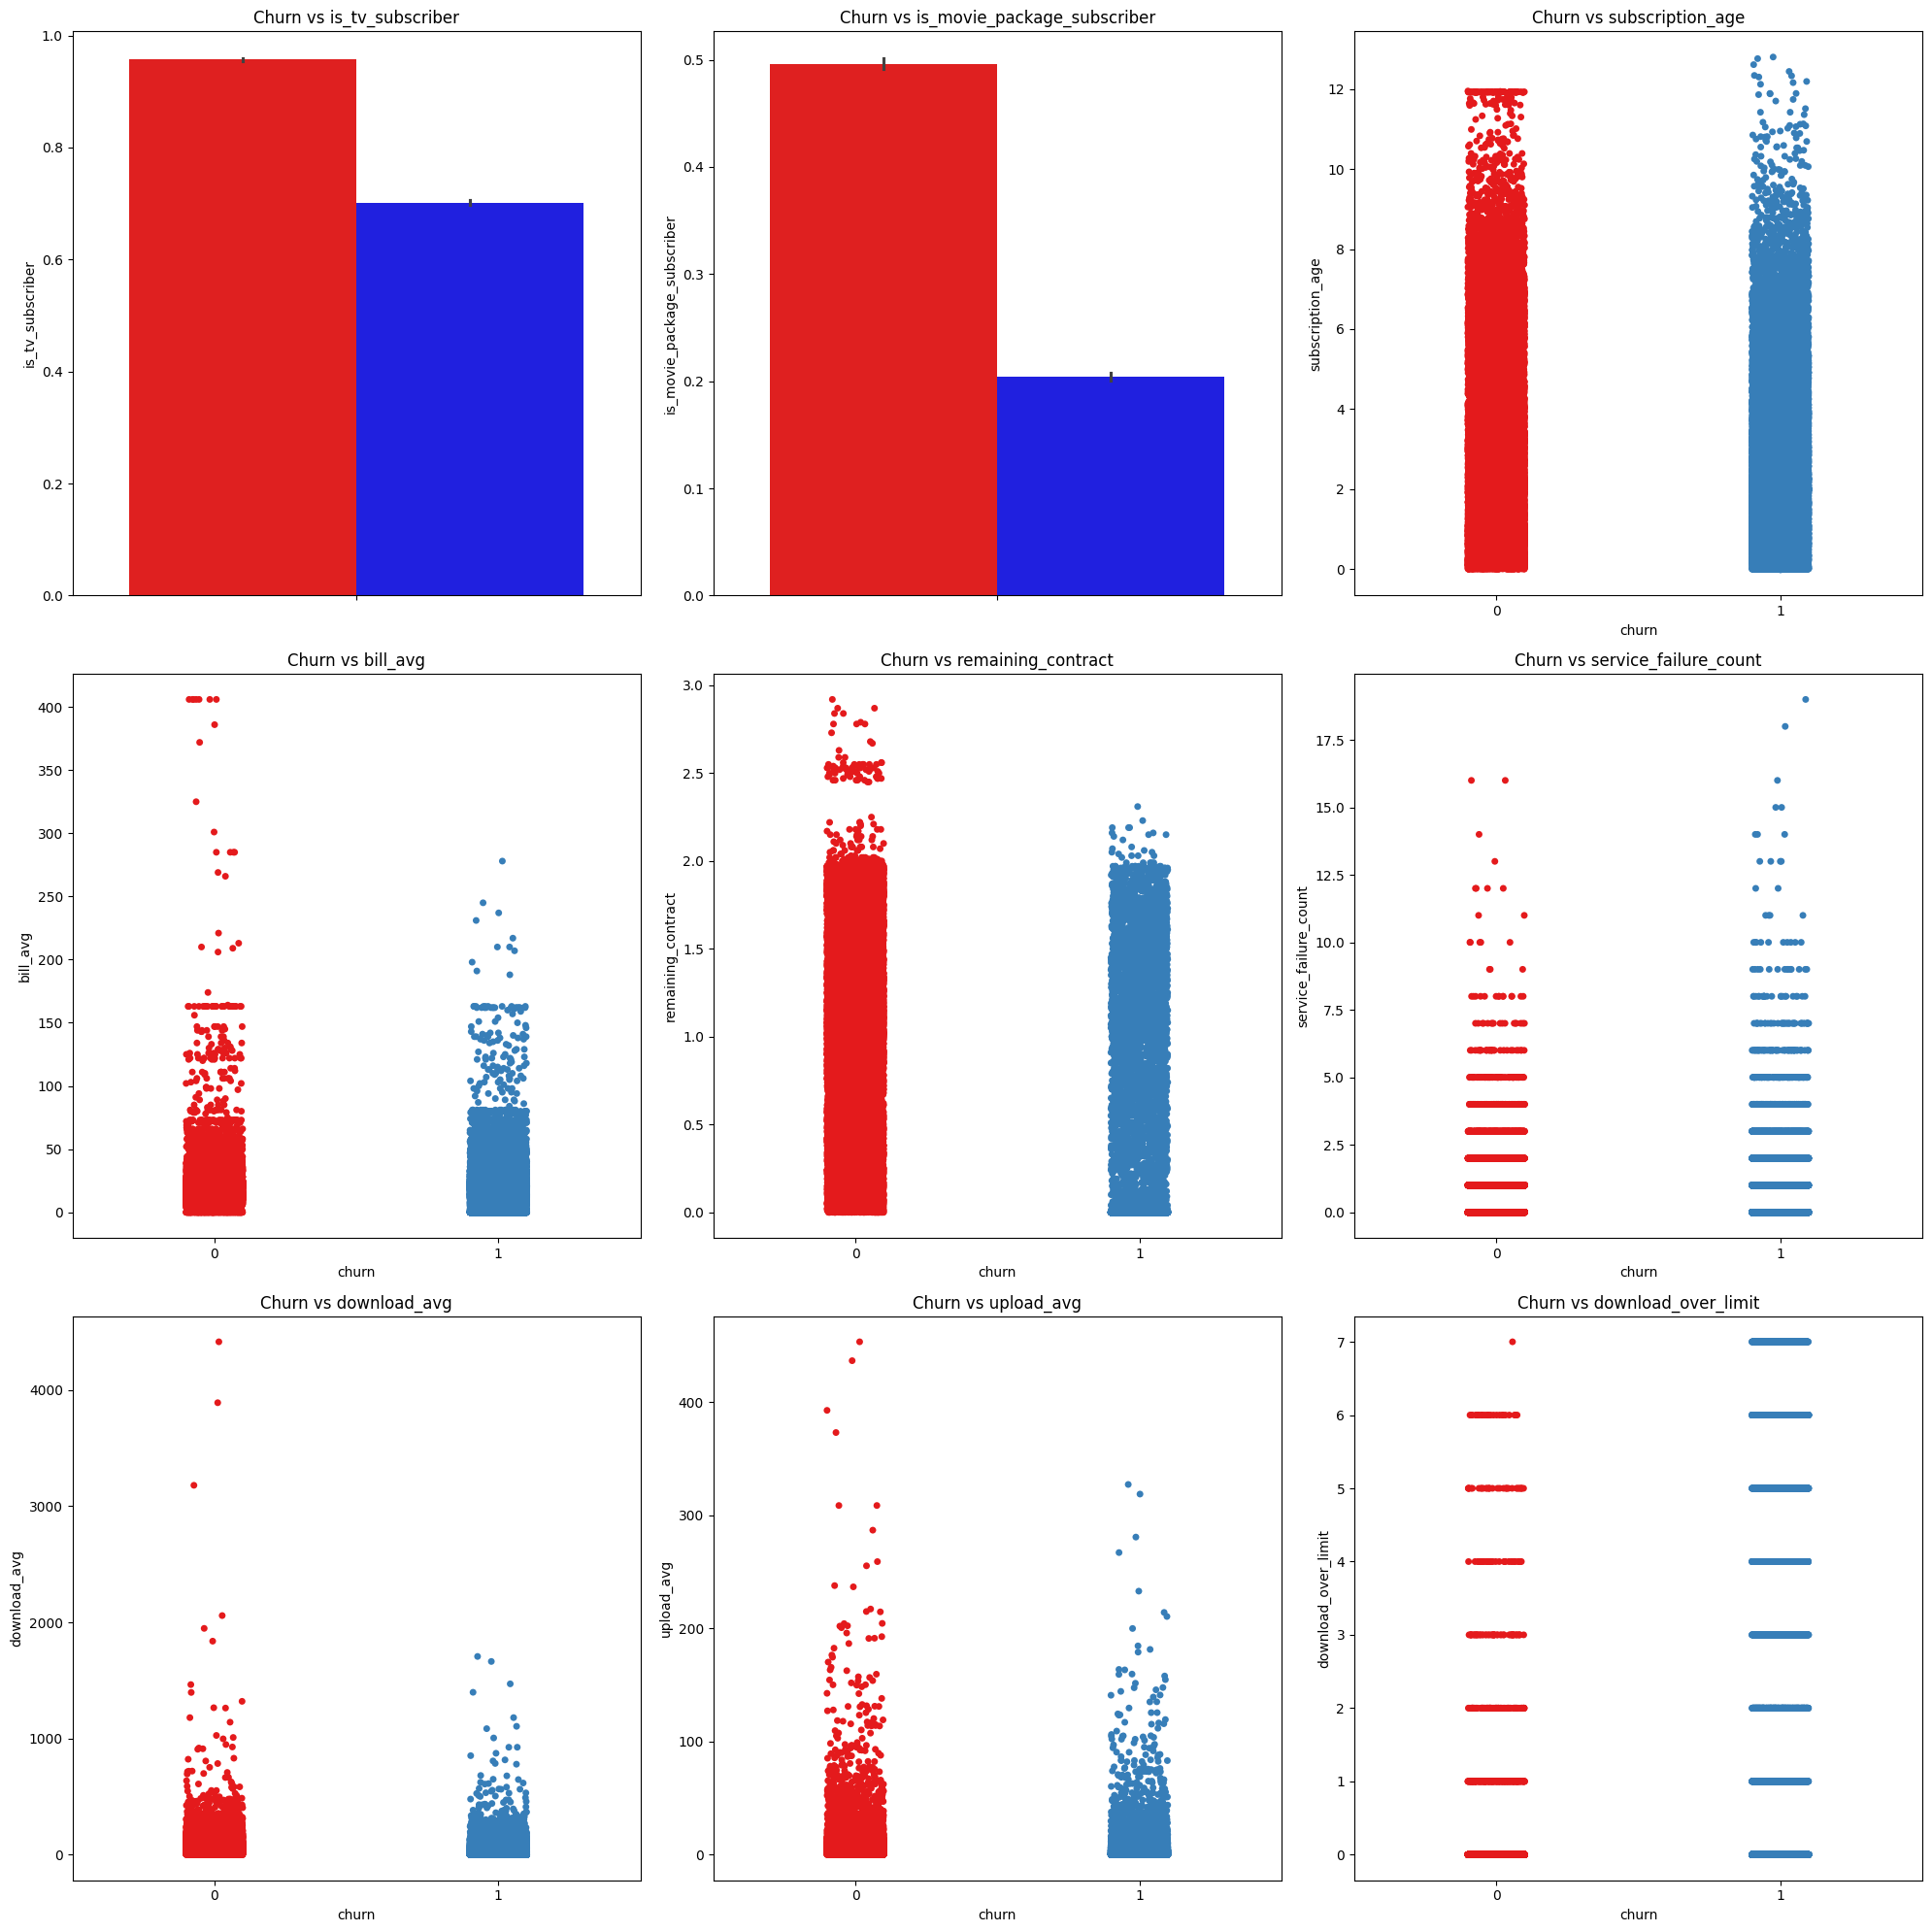

In [ ]:
plt.figure(figsize=(20, 20))

for i, feature in enumerate(X_names, 1):
    plt.subplot(3, 3, i)
    if i in [1, 2]:
        sns.barplot(hue='churn', y=feature, data=df, palette=['red', 'blue'], legend=False)
    else:
        sns.stripplot(x='churn', y=feature, data=df, jitter=True, palette='Set1', legend=False)
    plt.title(f'Churn vs {feature}')

plt.tight_layout()
plt.show()

O co chodzi w wykresie 1 i 2? Co one pokazują? Co można z nich odczytać? To jest, moim zdaniem, trochę niejasne

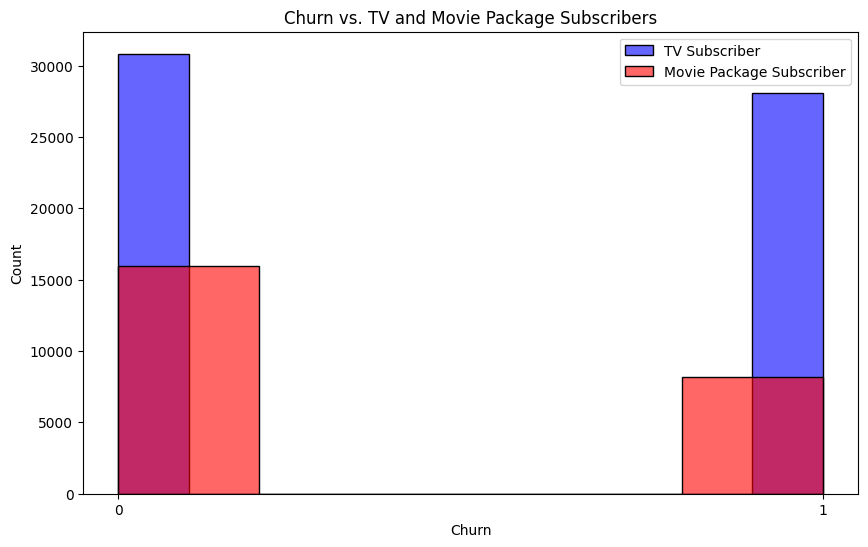

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(df[df['is_tv_subscriber'] == 1]['churn'], color='blue', alpha=0.6, label='TV Subscriber', binwidth=0.1)
sns.histplot(df[df['is_movie_package_subscriber'] == 1]['churn'], color='red', alpha=0.6, label='Movie Package Subscriber', binwidth=0.2)

plt.title('Churn vs. TV and Movie Package Subscribers')
plt.xticks([0, 1])
plt.xlabel('Churn')
plt.ylabel('Count')
plt.legend()

plt.show()

Opis oraz wnioski z powyższych wykresów:


[tekst B]


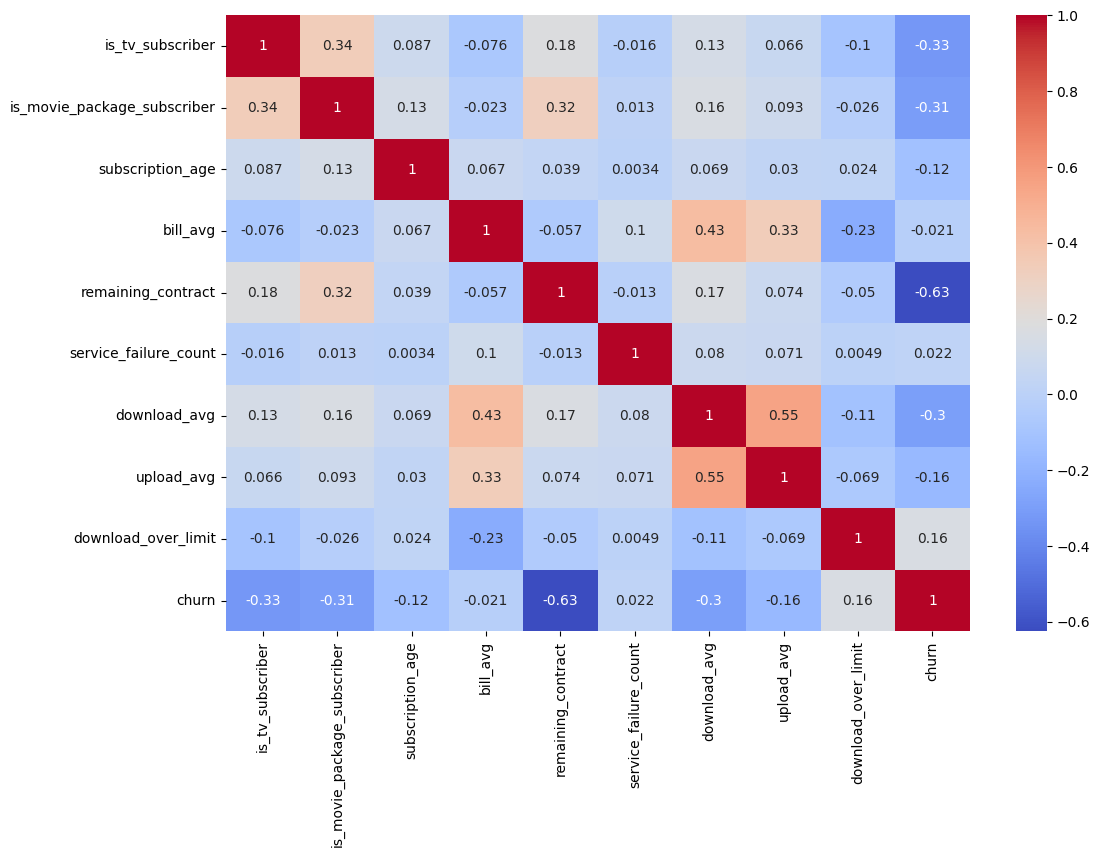

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Korelacje z churnem:

Najsilniejsza negatywna korelacja (-0.63) występuje między churnem, a remaining_contract. Wynika z tego, że klienci z dłuższym pozostałym okresem umowy są mniej skłonni do rezygnacji.
Umiarkowane negatywne korelacje z churnem mają: is_tv_subscriber (-0.33) i is_movie_package_subscriber (-0.31).Posiadanie dodatkowych usług może zmniejszać ryzyko churnu.
Słaba pozytywna korelacja (0.16) z download_over_limit sugeruje, że przekraczanie limitów może tylko nieznacznie zwiększać ryzyko churnu.

Cechy "bill_avg" oraz "service_failure_count" wydają się nie mieć wpływu na "churn". Sensowne będzie zatem usunięcie odpowiadających im kolumn z datasetu w celu uproszczenia modelu.

Uproszczenie modelu niesie za sobą pewne zalety:
- mniej stopni swobody oznacza mniejszą podatność na overfitting
- trenowanie modelu jest mniej kosztowne

Korelacje pomiędzy pozostałymi cechami:
Najsilniejsza jest korelacja pomiędzy cechami 'download_avg' i 'upload_avg'ale nie wydaje się wystarczająco silna aby którąś z cech pominąć.

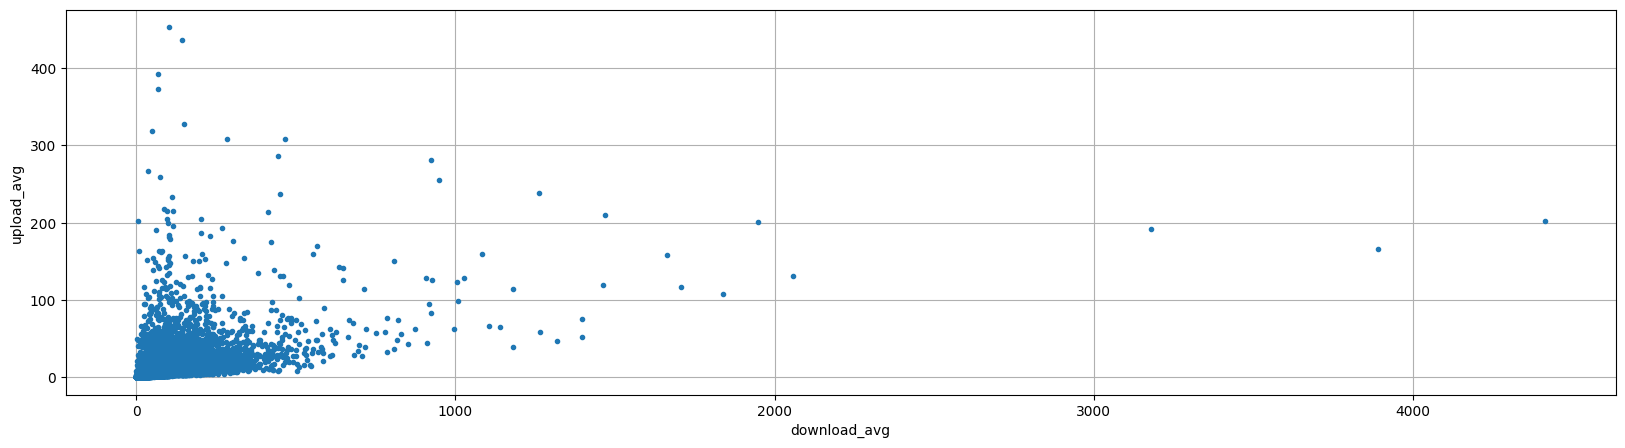

In [ ]:
simple_figure(feature1="download_avg", feature2="upload_avg",fsize=(20, 5))

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 8.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=2a3e85daeb169eafd2c5171fb92db6af3251284484bf94bfb8f12d283252b672
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
new_columns = all_columns.drop(['bill_avg', 'service_failure_count'])
print(new_columns)
new_df = df[new_columns]
print(new_df.head())
print(new_df.shape)


Index(['is_tv_subscriber', 'is_movie_package_subscriber', 'subscription_age',
       'remaining_contract', 'download_avg', 'upload_avg',
       'download_over_limit', 'churn'],
      dtype='object')
   is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
0                 1                            0             11.95   
1                 0                            0              8.22   
2                 1                            0              8.91   
3                 0                            0              6.87   
4                 0                            0              6.39   

   remaining_contract  download_avg  upload_avg  download_over_limit  churn  
0                0.14           8.4         2.3                    0      0  
1                 NaN           0.0         0.0                    0      1  
2                0.00          13.7         0.9                    0      1  
3                 NaN           0.0         0.0                    0

Na podstawie dotychczasowej analizy unęliśmy z wyjściowego datasetu kolumnę 'id' oraz uznaliśmy, że 'bill_avg' oraz 'service_failure_count' też mogą ewentualnie zostać usunięte.
Zidentyfikowaliśmy również problem itnienia ponad 21 tysięcy próbek, które mają wartość NaN w polu 'remaining contact'. Poniżej analiza danych z podziałem datasetu na trzy części, w zależności od zawartości pola 'remaining contract'  



In [ ]:
def create_subdf(df, bool_vec):
  subdf = df[bool_vec]
  print(subdf.shape)
  print(subdf.head())
  return subdf

In [ ]:
rc = "remaining_contract"

In [ ]:
bool_vec = df[rc] == 0
df_with_rc_0 = create_subdf(df, bool_vec)

(16363, 10)
    is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
2                  1                            0              8.91        16   
6                  0                            0              8.96        18   
10                 1                            1              8.44        17   
29                 1                            0             10.93        63   
80                 1                            1              8.19        14   

    remaining_contract  service_failure_count  download_avg  upload_avg  \
2                  0.0                      0          13.7         0.9   
6                  0.0                      0          21.3         2.0   
10                 0.0                      0           9.9         1.1   
29                 0.0                      0          38.1         7.9   
80                 0.0                      4          11.5         2.0   

    download_over_limit  churn  
2                

In [ ]:
bool_vec = df[rc] > 0
df_with_rc_gt_0 = create_subdf(df, bool_vec)

(34339, 10)
    is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
0                  1                            0             11.95        25   
5                  1                            1             11.94        32   
11                 1                            1             11.93        10   
14                 0                            0              6.97        23   
15                 1                            1             11.93        18   

    remaining_contract  service_failure_count  download_avg  upload_avg  \
0                 0.14                      0           8.4         2.3   
5                 1.38                      0          69.4         4.0   
11                1.28                      0          10.6         0.6   
14                0.28                      0           0.0         0.0   
15                1.80                      0           1.0         0.0   

    download_over_limit  churn  
0                

In [ ]:
bool_vec = df[rc].isna()
df_with_rc_NaN = create_subdf(df, bool_vec)

(21572, 10)
   is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
1                 0                            0              8.22         0   
3                 0                            0              6.87        21   
4                 0                            0              6.39         0   
7                 0                            0              5.48        14   
8                 0                            0              8.54         0   

   remaining_contract  service_failure_count  download_avg  upload_avg  \
1                 NaN                      0           0.0         0.0   
3                 NaN                      1           0.0         0.0   
4                 NaN                      0           0.0         0.0   
7                 NaN                      1           0.0         0.0   
8                 NaN                      0           0.0         0.0   

   download_over_limit  churn  
1                    0      1 

In [ ]:
df_with_rc_NaN.describe()

is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
count      21572.000000                 21572.000000      21572.000000   
mean           0.630910                     0.183710          2.807239   
std            0.482569                     0.387257          1.805538   
min            0.000000                     0.000000          0.000000   
25%            0.000000                     0.000000          1.910000   
50%            1.000000                     0.000000          2.310000   
75%            1.000000                     0.000000          3.550000   
max            1.000000                     1.000000         12.800000   

           bill_avg  remaining_contract  service_failure_count  download_avg  \
count  21572.000000                 0.0           21572.000000  21518.000000   
mean      20.484888                 NaN               0.275450     26.134511   
std       18.486054                 NaN               0.843656     68.532786   
min        0.000000                 NaN               0.000000      0.000000   
25%       13.000000                 NaN               0.000000      0.000000   
50%       21.000000                 NaN               0.000000      9.100000   
75%       24.000000                 NaN               0.000000     30.300000   
max      406.000000                 NaN              19.000000   3890.800000   

         upload_avg  download_over_limit         churn  
count  21518.000000         21572.000000  21572.000000  
mean       2.713310             0.520119      0.914102  
std        8.776637             1.564586      0.280220  
min        0.000000             0.000000      0.000000  
25%        0.000000             0.000000      1.000000  
50%        0.700000             0.000000      1.000000  
75%        2.500000             0.000000      1.000000  
max      280.700000             7.000000      1.000000

from matplotlib import pyplot as plt
_df_0['is_tv_subscriber'].plot(kind='hist', bins=20, title='is_tv_subscriber')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['is_movie_package_subscriber'].plot(kind='hist', bins=20, title='is_movie_package_subscriber')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['subscription_age'].plot(kind='hist', bins=20, title='subscription_age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['bill_avg'].plot(kind='hist', bins=20, title='bill_avg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='is_tv_subscriber', y='is_movie_package_subscriber', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='is_movie_package_subscriber', y='subscription_age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='subscription_age', y='bill_avg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='bill_avg', y='remaining_contract', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['is_tv_subscriber'].plot(kind='line', figsize=(8, 4), title='is_tv_subscriber')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['is_movie_package_subscriber'].plot(kind='line', figsize=(8, 4), title='is_movie_package_subscriber')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['subscription_age'].plot(kind='line', figsize=(8, 4), title='subscription_age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['bill_avg'].plot(kind='line', figsize=(8, 4), title='bill_avg')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df_with_rc_0.describe()

is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
count      16363.000000                 16363.000000      16363.000000   
mean           0.777425                     0.185296          1.765353   
std            0.415988                     0.388549          1.568404   
min            0.000000                     0.000000          0.000000   
25%            1.000000                     0.000000          0.710000   
50%            1.000000                     0.000000          1.300000   
75%            1.000000                     0.000000          2.090000   
max            1.000000                     1.000000         11.420000   

           bill_avg  remaining_contract  service_failure_count  download_avg  \
count  16363.000000             16363.0           16363.000000  16363.000000   
mean      18.398215                 0.0               0.301106     30.392886   
std       10.913337                 0.0               0.865318     45.121514   
min        0.000000                 0.0               0.000000      0.000000   
25%       13.000000                 0.0               0.000000      1.100000   
50%       19.000000                 0.0               0.000000     17.400000   
75%       22.000000                 0.0               0.000000     43.100000   
max      245.000000                 0.0              18.000000   1470.300000   

         upload_avg  download_over_limit        churn  
count  16363.000000         16363.000000  16363.00000  
mean       3.192465             0.127605      0.99560  
std        8.435582             0.751056      0.06619  
min        0.000000             0.000000      0.00000  
25%        0.100000             0.000000      1.00000  
50%        1.200000             0.000000      1.00000  
75%        3.400000             0.000000      1.00000  
max      318.700000             7.000000      1.00000

In [ ]:
df_with_rc_gt_0.describe()

is_tv_subscriber  is_movie_package_subscriber  subscription_age  \
count      34339.000000                 34339.000000      34339.000000   
mean           0.949096                     0.500597          2.551931   
std            0.219805                     0.500007          2.276445   
min            0.000000                     0.000000         -0.020000   
25%            1.000000                     0.000000          0.800000   
50%            1.000000                     1.000000          1.830000   
75%            1.000000                     1.000000          3.710000   
max            1.000000                     1.000000         12.760000   

           bill_avg  remaining_contract  service_failure_count  download_avg  \
count  34339.000000        34339.000000           34339.000000  34012.000000   
mean      18.232884            1.057242               0.260666     61.193626   
std        9.696433            0.597308               0.774051     62.934963   
min        0.000000            0.010000               0.000000      0.000000   
25%       13.000000            0.540000               0.000000     23.800000   
50%       17.000000            1.070000               0.000000     46.500000   
75%       22.000000            1.600000               0.000000     81.700000   
max      386.000000            2.920000              16.000000   4415.200000   

         upload_avg  download_over_limit         churn  
count  34012.000000         34339.000000  34339.000000  
mean       5.608538             0.049419      0.117650  
std       10.814591             0.443471      0.322198  
min        0.000000             0.000000      0.000000  
25%        1.700000             0.000000      0.000000  
50%        3.600000             0.000000      0.000000  
75%        6.500000             0.000000      0.000000  
max      453.300000             7.000000      1.000000

Z powyższych tabel można odczytać, że wśród klientów, u których pozostały okres umowy ('remaining_contract') jest równy 0, prawie 100%, to klienci którzy odeszli. Jeśli komuś skończyła się umowa i jej nie przedłużył, to znaczy, nie nabył nowego okresu umowy, to jest "odejśnięty" (:D). Te 0,0044 % pozostałych prawdopodobnie można interpretować jako klientów, których umowa wygasa w dniu, w którym ostatni raz została uaktualniona baza i jeszcze jej nie przedłużyli ale też jeszcze nie odeszli.


... CDN ....



Przedstawimy różne podejścia do rozwiązania tego problemu i na ich podstawie zbudujemy różne modele. Uznaliśmy, że przy takim podejściu zasadne będzie podzielenie wyjściowego, nieprzetworzonego datasetu na część treningową i testową. Część treningową każdy będzie przetwarzał według innej koncepcji. Część testowa pozostaje "tajna" i nienaruszona, gdyż posłuży do porównania wdrożonych metod przetwarzania danych i trenowania na nich zbudowanego modelu.

Koniec etapu "Wstępna analiza danych".